In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../data/processed/food_waste_clean.csv")

In [5]:
df.shape

(5000, 11)

In [8]:
df.columns

Index(['country', 'year', 'food_category', 'total_waste_(tons)',
       'economic_loss_(million_$)', 'avg_waste_per_capita_(kg)',
       'population_(million)', 'household_waste_(%)', 'per_capita_waste_kg',
       'economic_loss_per_ton', 'date'],
      dtype='object')

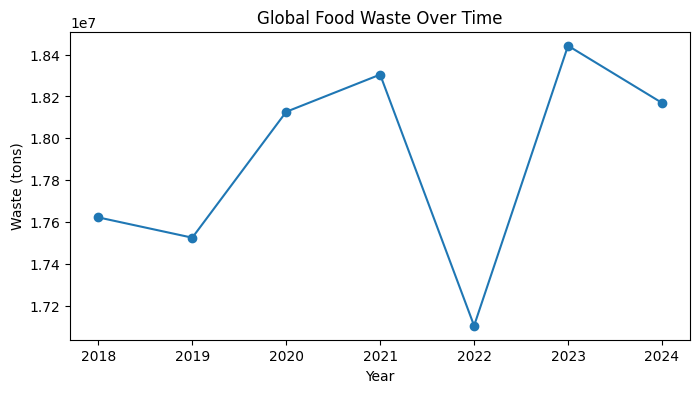

In [9]:
#Trend (global)
trend = df.groupby('year')['total_waste_(tons)'].sum()
plt.figure(figsize=(8,4))
trend.plot(marker='o')
plt.title("Global Food Waste Over Time")
plt.xlabel("Year")
plt.ylabel("Waste (tons)")
plt.show()

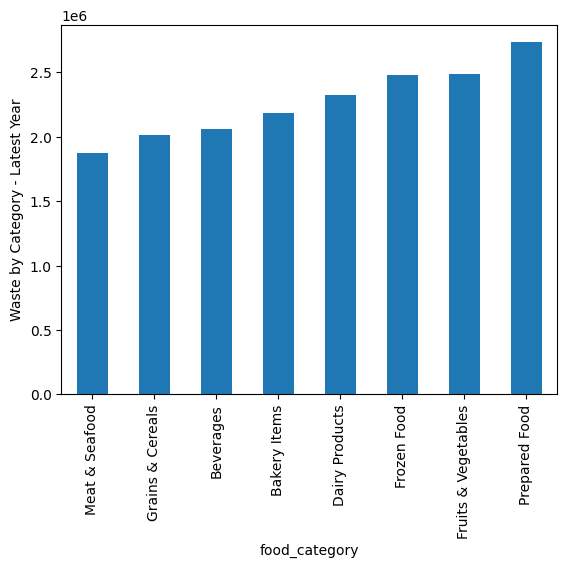

In [10]:
#Category share latest year
latest = df[df['year'] == df['year'].max()]
cat = latest.groupby('food_category')['total_waste_(tons)'].sum().sort_values()
cat.plot(kind = 'bar')
plt.ylabel("Waste by Category - Latest Year")
plt.show()

In [ ]:
#Country - level KPI table for dasboard
country_kpi = df.groupby('country', as_index = False).agg(
    waste_tons = ('total_waste_(tons)','sum'),
    economic_loss_million_usd = ('economic_loss_(million_$)','sum'),
    per_capita_waste_kg = ('per_capita_waste_kg','mean'),
    population_million = ('population_(million)','mean')   
)
country_kpi.to_csv("../outputs/country_kpi.csv", index=False)
print("KPI table saved to outputs/country_kpi.csv")

KPI table saved to outputs/country_kpi.csv
